In [24]:
from mmcv.utils import build_from_cfg
from mmseg.datasets.builder import DATASETS, build_dataloader

In [31]:
crop_size = (680, 680)

train_pipeline = [
    dict(type='LoadImageFromFile'),
    # dict(type='LoadAnnotations'),
    dict(type='DilateAnnotations', num_class = 5, class_to_dialte=[1]),
    dict(type='RandomFlip', flip_ratio=0),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

In [32]:
data = dict(
    pipeline=train_pipeline,
    type='ConcreteDamageDataset',
    data_root='/home/user/#datasets/concrete_damage',
    img_dir='leftImg8bit/train',
    ann_dir='gtFine/train',
    )
    

In [33]:
dataset = build_from_cfg(data, DATASETS)

2022-08-12 15:18:54,549 - mmseg - INFO - Loaded 3440 images


In [34]:
samples_per_gpu=1
workers_per_gpu=1

dataloader = build_dataloader(dataset, 
                              samples_per_gpu,
                              workers_per_gpu)

You are using DistributedSampler


In [35]:
dataloader = iter(dataloader)

results[key].dtype uint8
class_idx 4
class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[key].dtype uint8
class_idx 4
class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[key].dtype uint8
class_idx 4
class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[key].dtype uint8
class_idx 4
class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[key].dtype uint8
class_idx 4
class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[key].dtype uint8
class_idx 4
class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[key].dtype uint8
class_idx 4
class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[key].dtype uint8
class_idx 4
class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[key].dtype uint8

class_idx 4class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[key].dtype uint8
class_idx 4
class_idx 3
class_idx 2
class_idx 1
dilate_result.dtype uint8
results[ke

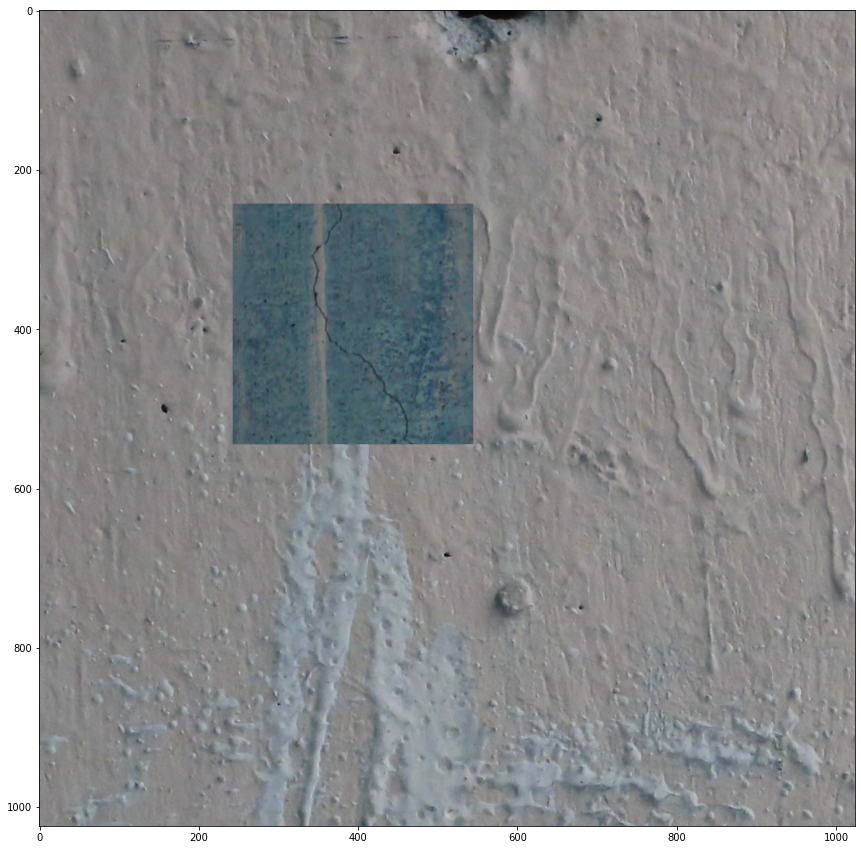

In [62]:
import matplotlib.pyplot as plt
import numpy as np


loaded_data = next(dataloader)

img = loaded_data['img'].data[0].numpy()

img = np.transpose(img[0, :], (1, 2, 0))

plt.figure(figsize = (15, 15))
plt.imshow(img)



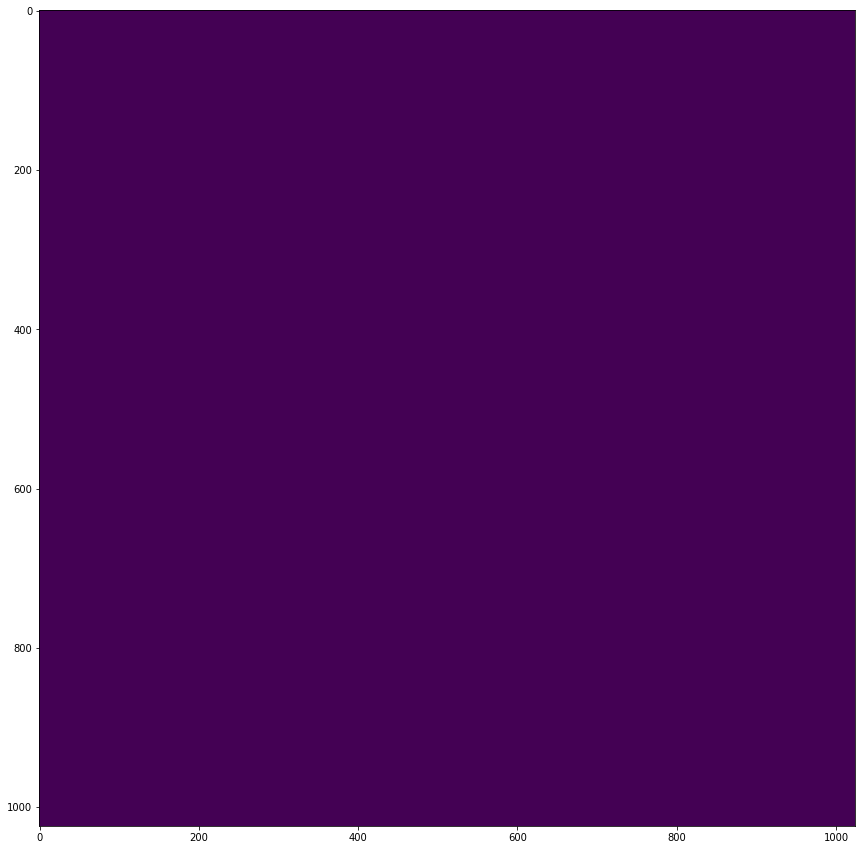

In [67]:
seg = loaded_data['gt_semantic_seg'].data[0].numpy()

seg = np.squeeze(np.transpose(seg[0, :], (1, 2, 0)))

plt.figure(figsize = (15, 15))
plt.imshow(seg==5)